# Metropolis - Hastings

V1.0, Sep 2025

file: metropolis.ipynb

**Objeto:** una aproximación formal al algoritmo Metropolis-Hastings

## El algoritmo

### 1. Metropolis (1953) – El primer aporte

- En **1953**, un grupo de físicos liderados por **Nicholas Metropolis** en el Laboratorio Nacional de Los Álamos publicó un artículo titulado *"Equation of State Calculations by Fast Computing Machines"*.
- El objetivo era simular el comportamiento de átomos en un material usando el **método de Monte Carlo**.
- El algoritmo original (ahora conocido como **algoritmo de Metropolis**) fue diseñado para muestrear distribuciones de probabilidad en física estadística, particularmente la distribución de Boltzmann.
- **Característica clave**: 
  - Usaba una **propuesta simétrica** (es decir, la probabilidad de proponer un nuevo estado $ x' $ desde $ x $ era la misma que proponer $ x $ desde $ x' $).
  - La aceptación o rechazo del nuevo estado dependía de la razón de las densidades de probabilidad.

### 2. Hastings (1970) – La generalización

- En **1970**, el estadístico **Wilfred Keith Hastings** publicó un artículo titulado *"Monte Carlo Sampling Methods Using Markov Chains and Their Applications"* en la revista *Biometrika*.
- Hastings generalizó el algoritmo de Metropolis para permitir **cadenas de Markov con propuestas no simétricas**.
- Esto significa que la probabilidad de proponer un movimiento de $ x $ a $ x' $ puede ser diferente a la de $ x' $ a $ x $.
- Para mantener la propiedad de balance detallado, Hastings introdujo un factor de corrección en la probabilidad de aceptación, que ahora lleva su nombre.

### 3. Unificación del nombre

- Con el tiempo, la versión generalizada de Hastings se convirtió en el estándar en estadística y ciencias computacionales.
- La comunidad comenzó a referirse al método como **Metropolis–Hastings** para reconocer ambas contribuciones:
  - **Metropolis** por el algoritmo original y la idea de aceptación/rechazo.
  - **Hastings** por la generalización a propuestas asimétricas.

### 4. Matemáticas

En el paper original de 1953, Metropolis trabaja con **sistemas termodinámicos** donde la probabilidad de un estado viene dado por la distribución de  Boltzmann, que es:

$$
P(\text{estado}) \propto \exp\left(-\frac{E}{kT}\right)
$$

Con:
- $E$ = energía del estado
- $kT$ = constante física

**Ratio de aceptación:**
$$
\alpha = \min\left(1, \exp\left(-\frac{\Delta E}{kT}\right)\right)
$$

donde $\Delta E = E_{\text{propuesto}} - E_{\text{actual}}$

Se acepta siempre si la energía disminuye, y  a veces incluso si **aumenta**!


**Metrópolis-Hastings (1970)**: Generaliza el concepto para cualquier distribución
  
$$
\alpha = \min(1,\frac{P_{propuesto}}{P_{actual}})
$$


**En el fondo son equivalentes** para distribuciones de la forma:

$$
P(x) \propto \exp(-E(x))
$$

Por ejemplo, para la distribución de Boltzmann:

$$
\frac{P_{\text{propuesto}}}{P_{\text{actual}}} = \frac{\exp(\frac{-E_{\text{propuesto}}}{kT})}{\exp(\frac{-E_{\text{actual}}}{kT})} = \exp\left(-\frac{\Delta E}{kT}\right)
$$

**Metrópolis-Hastings:**
$$
\alpha_{Hastings} = \min\left(1, \frac{P_{\text{propuesto}}}{P_{\text{actual}}}\right) = \alpha_{Metropolis} 
$$

**Son idénticas** en este caso.

#### Generalización de Hastings

En realidad Hastings, además de generalizar las distribuciones, propone un mecanismo para romper la simetría de las transiciones:

1. **Metropolis (versión original, física estadística)**

* Objetivo: simular un sistema con distribución de equilibrio de Boltzmann
  $$
  P(x) \propto e^{-E(x)/kT}.
  $$

* Propuesta simétrica: $q(x\to x') = q(x'\to x)$.
  Entonces la probabilidad de aceptación se define como:
  $$
  A(x\to x') = \min\left(1, e^{-(E(x') - E(x))/kT}\right).
  $$

Esta es la famosa regla “aceptar siempre si baja la energía, aceptar a veces si sube”.


2. **Generalización Metropolis–Hastings**

* Objetivo: muestrear desde cualquier distribución $\pi(x)$.
* Propuesta arbitraria $q(x\to x')$, no necesariamente simétrica.
* Probabilidad de aceptación:
  $$
  A(x\to x') = \min\left(1, \frac{\pi(x'), q(x'\to x)}{\pi(x), q(x\to x')}\right).
  $$

Si la propuesta es **simétrica** $q(x\to x') = q(x'\to x)$, se simplifica a:
$$
A(x\to x') = \min\left(1, \frac{\pi(x')}{\pi(x)}\right).
$$


3. **Equivalencia entre ambas fórmulas**

En el caso Boltzmann:

$$
\pi(x) = e^{-E(x)/kT}.
$$

El cociente de probabilidades es
$$
\frac{\pi(x')}{\pi(x)} = e^{-[E(x') - E(x)]/kT}.
$$

Y eso es **exactamente** la regla de Metropolis original:
$$
A(x\to x') = \min\left(1, e^{-(\Delta E)/kT}\right).
$$

* La regla de aceptación por cociente de probabilidades en Metropolis–Hastings es la general.
* En el caso especial de Metropolis (propuesta simétrica + distribución de Boltzmann), se reduce exactamente a la exponencial de la diferencia de energía.

## Hands On: La montaña 

**Objetivo**:

* **Alcanzar** y **Permanecer** sobre la cima de una montaña dando pasos aleatorios

**Perfil**:

* f(x) = exp(-(x-5)²/2)  # Distribución normal centrada en x=5

Aquí se ha definido **directamente una densidad de probabilidad** (P(x)), no una energía.

* En ese caso, lo que el algoritmo usa es el **cociente de probabilidades**:
  $$
  A(x \to x') = \min\Big(1, \frac{P(x')}{P(x)}\Big).
  $$
* Moral:

  * Si (P(x') > P(x)) (es decir, “más alto en la montaña”), se acepta siempre.
  * Si (P(x') < P(x)) (más bajo), se  acepta a veces.

Si se quiere expresarlo en el lenguaje de “energía” de Metropolis, se puede definir:
$$
E(x) \equiv -\ln f(x).
$$

En este caso:
$$
E(x) = -\ln\Big(e^{-(x-5)^2/2}\Big) = \tfrac{1}{2}(x-5)^2.
$$

Entonces:

* El **pico de la montaña** en probabilidad corresponde al **mínimo de energía**.
* Cuando “se sube la altura de la montaña”, en términos de energía en física eso significa **baja la energía**, por eso la aceptación aumenta.


Si finalmente se trabaja con la formulación en probabilidades (P(x)):

* Se calcula el **ratio** o razón de **aceptación**
  $$
  r = \frac{P(x')}{P(x)} = \frac{h_2}{h_1}.
 $$

* Caso $r \geq 1$: se acepta siempre (porque $x'$ es más probable)

* Caso $r < 1$: se acepta con probabilidad $r$. A nivel algorítmico se obtiene número random R, y si $R<r$, se acepta.

** Ejemplo:

    * Si (r=0.8): se  acepta con probabilidad 0.8.
    * Si (r=0.5): se acepta  con probabilidad 0.5.
    * Si (r=0.3): se acepta  con probabilidad 0.3.

A nivel algorítmico se obtiene número random R, y si $R<r$, se acepta.

## Evolución esperada

* Al principio: El explorador deambula aleatoriamente

* Con el tiempo: Pasa más tiempo cerca de la cima (x = 5)

* El histograma de sus posiciones se parecerá a la forma de la montaña

## La magia algorítmica

* Acepta casi siempre movimientos hacia arriba

* Acepta a veces movimientos hacia abajo (con probabilidad proporcional al ratio h2/h1)

* Resultado: Explora toda la montaña, pero pasa más tiempo en las zonas altas

* Ideal para  muestrear distribuciones de probabilidad en estadística Bayesiana

### Código propuesto

1. **Función objetivo**

    f(x) = exp(-(x-5)²/2)

   ```python
   def montaña(x):
       return np.exp(-(x - 5)**2 / 2)
   ```

   Desribe el perfil energético, la “montaña” analítica, como una gaussiana centrada en 5 con varianza 1.

2. **Propuesta simétrica**

   ```python
   x_propuesto = x_actual + np.random.normal(0, tamaño_paso)
   ```

   La distribución de propuestas es gaussiana y simétrica, lo que justifica usar simplemente el cociente de probabilidades (  f(x') / f(x) ).  Por conveniencia  se hace **kT=1**.

3. **Criterio de aceptación**

   ```python
   razon = altura_propuesta / altura_actual
   if razon >= 1 or np.random.random() < razon:
       ...
   ```
   Implementa la regla de Metropolis, aceptando siempre mejoras y a veces retrocesos.

4. **Retorno de muestras y tasa de aceptación**
   Devuelve la trayectoria y la proporción de aceptaciones, lo cual es fundamental para diagnosticar eficiencia.

**Comentarios**

1. **Interpretación física**
   El algoritmo lo que hace es generar una cadena de Markov con distribución estacionaria proporcional a f(x).

   * Dado que f(x) es una gaussiana, la cadena se concentrará en torno a 5, pero con fluctuaciones típicas de una gaussiana.
   * Es decir, no se queda “pegado” en la cima, sino que explora la campana según la densidad.


2. **Tamaño de paso**
   El parámetro `tamaño_paso` controla el trade-off:

   * Muy pequeño → alta tasa de aceptación, pero exploración lenta (muestras muy correlacionadas).
   * Muy grande → baja aceptación, se queda atascado.
     Para una gaussiana en 1D, algo entre 0.5 y 1 suele ser razonable.

3. **Eficiencia numérica**
   En lugar de calcular directamente alturas, se podría trabajar con logaritmos para estabilidad numérica, y que además coincide con las energías en el formalismo original de Metropolis.

   ```python
   E1=log_altura_actual = -(x_actual - 5)**2 / 2
   E2=log_altura_propuesta = -(x_propuesto - 5)**2 / 2
   delta = E2-E1
   if delta >= 0 or np.log(np.random.random()) < delta:
       ...
   ```
   Esto evita desbordamientos en distribuciones más extremas.

### Código

=== METRÓPOLIS PARA PERFIL DE MONTANA ===
Tasa de aceptación: 0.838
Posición promedio: 4.991
Desviación estándar: 1.003


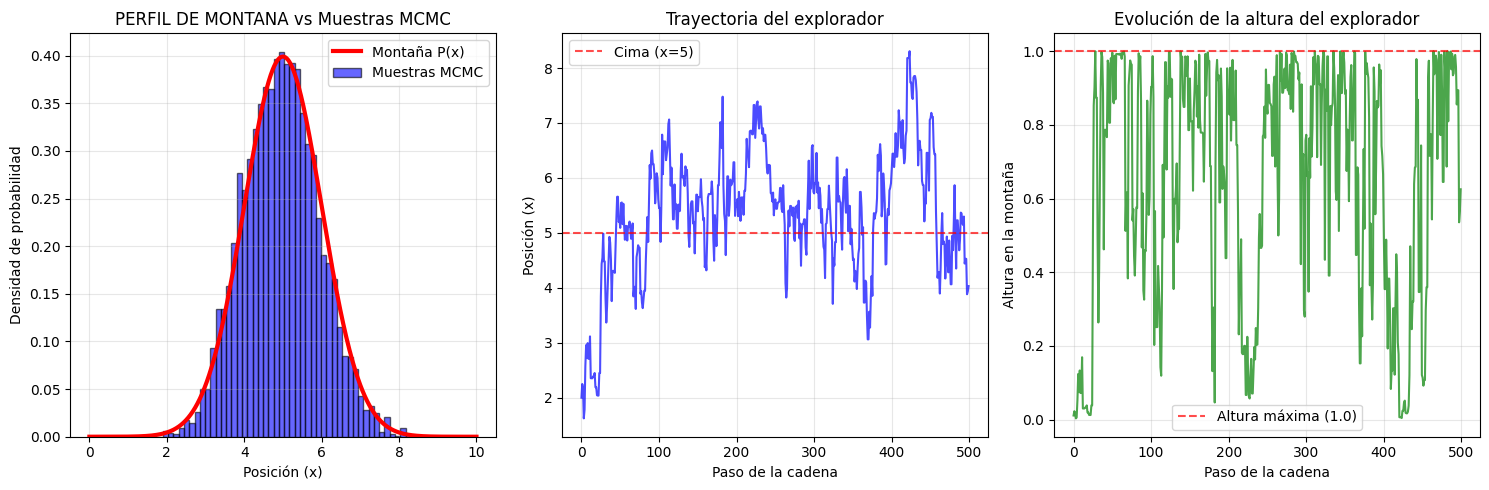


=== PRIMEROS PASOS DETALLADOS ===

Paso 1:
  Actual: x = 2.00, altura = 0.011
  Propuesto: x = 1.65, altura = 0.004
  Razón = 0.329
  ACEPTA (random 0.071 < razón 0.329)

Paso 2:
  Actual: x = 1.65, altura = 0.004
  Propuesto: x = 1.05, altura = 0.000
  Razón = 0.114
  RECHAZA (random 0.332 ≥ razón 0.114)

Paso 3:
  Actual: x = 1.65, altura = 0.004
  Propuesto: x = 1.95, altura = 0.009
  Razón = 2.597
  ACEPTA (razón ≥ 1 → sube la montaña)

Paso 4:
  Actual: x = 1.95, altura = 0.009
  Propuesto: x = 1.92, altura = 0.009
  Razón = 0.924
  ACEPTA (random 0.313 < razón 0.924)

Paso 5:
  Actual: x = 1.92, altura = 0.009
  Propuesto: x = 1.83, altura = 0.006
  Razón = 0.739
  ACEPTA (random 0.191 < razón 0.739)

Paso 6:
  Actual: x = 1.83, altura = 0.006
  Propuesto: x = 1.97, altura = 0.010
  Razón = 1.560
  ACEPTA (razón ≥ 1 → sube la montaña)


In [16]:
import numpy as np
import matplotlib.pyplot as plt

# La montaña ES la distribución normal (perfil de probabilidad)
def montaña(x):
    """Perfil de la montaña = distribución normal centrada en x=5"""
    return np.exp(-(x - 5)**2 / 2)

# Algoritmo de Metrópolis-Hastings para P(x) directo

def metropolis_montaña(n_pasos, x_inicial, tamaño_paso=0.5):
    x_actual = x_inicial
    muestras = [x_actual]
    aceptaciones = 0
    
    for i in range(n_pasos):
        # Propuesta simétrica
        x_propuesto = x_actual + np.random.normal(0, tamaño_paso)
        
        # Calcular ALTURAS (probabilidades) directamente
        altura_actual = montaña(x_actual)
        altura_propuesta = montaña(x_propuesto)

        # kt=1
        
        Prob=np.exp(altura_propuesta-altura_actual)
        
        # Criterio de aceptación (ratio de probabilidades)
        razon = altura_propuesta / altura_actual
        
        if razon >= 1 or np.random.random() < razon:
            x_actual = x_propuesto
            aceptaciones += 1
        
        muestras.append(x_actual)
    
    tasa_aceptacion = aceptaciones / n_pasos
    return np.array(muestras), tasa_aceptacion

# Ejecutar simulación
np.random.seed(42)
n_pasos = 10000
x_inicial = 2.0

muestras, tasa_aceptacion = metropolis_montaña(n_pasos, x_inicial)

print("=== METRÓPOLIS PARA PERFIL DE MONTANA ===")
print(f"Tasa de aceptación: {tasa_aceptacion:.3f}")
print(f"Posición promedio: {np.mean(muestras):.3f}")
print(f"Desviación estándar: {np.std(muestras):.3f}")

# Visualización
plt.figure(figsize=(15, 5))

# Subplot 1: Montaña teórica vs muestras
plt.subplot(1, 3, 1)
x = np.linspace(0, 10, 1000)
perfil_teorico = montaña(x)
# Normalizar para que sea densidad de probabilidad
perfil_normalizado = perfil_teorico / np.trapz(perfil_teorico, x)

plt.plot(x, perfil_normalizado, 'r-', linewidth=3, label='Montaña P(x)')
plt.hist(muestras[1000:], bins=50, density=True, alpha=0.6, 
         label='Muestras MCMC', color='blue', edgecolor='black')
plt.xlabel('Posición (x)')
plt.ylabel('Densidad de probabilidad')
plt.title('PERFIL DE MONTANA vs Muestras MCMC')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Trayectoria del explorador
plt.subplot(1, 3, 2)
plt.plot(muestras[:500], 'b-', alpha=0.7)
plt.axhline(y=5, color='red', linestyle='--', alpha=0.7, label='Cima (x=5)')
plt.xlabel('Paso de la cadena')
plt.ylabel('Posición (x)')
plt.title('Trayectoria del explorador')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 3: Evolución de la altura
plt.subplot(1, 3, 3)
alturas = montaña(muestras[:500])
plt.plot(alturas, 'g-', alpha=0.7)
plt.axhline(y=1.0, color='red', linestyle='--', alpha=0.7, label='Altura máxima (1.0)')
plt.xlabel('Paso de la cadena')
plt.ylabel('Altura en la montaña')
plt.title('Evolución de la altura del explorador')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Primeros pasos detallados
print("\n=== PRIMEROS PASOS DETALLADOS ===")
x_actual = 2.0
for i in range(6):
    x_propuesto = x_actual + np.random.normal(0, 0.5)
    altura_actual = montaña(x_actual)
    altura_propuesta = montaña(x_propuesto)
    razon = altura_propuesta / altura_actual
    
    print(f"\nPaso {i+1}:")
    print(f"  Actual: x = {x_actual:.2f}, altura = {altura_actual:.3f}")
    print(f"  Propuesto: x = {x_propuesto:.2f}, altura = {altura_propuesta:.3f}")
    print(f"  Razón = {razon:.3f}")
    
    if razon >= 1:
        decision = "ACEPTA (razón ≥ 1 → sube la montaña)"
        x_actual = x_propuesto
    else:
        dado = np.random.random() # motor Montecarlo: tira dado
        if dado < razon:
            decision = f"ACEPTA (random {dado:.3f} < razón {razon:.3f})"
            x_actual = x_propuesto
        else:
            decision = f"RECHAZA (random {dado:.3f} ≥ razón {razon:.3f})"
    
    print(f"  {decision}")

### Nota

La regla de Metropolis (o Metropolis–Hastings con propuesta simétrica) usa el cociente de probabilidades:
$$
r = \frac{h_2}{h_1}.
$$
Aceptar si $r\ge 1$  y o con probabilidad $r$ si $r<1$.
Equivalente a escribir $con (kT=1)$:
$$
r = \exp\big(-[E_2-E_1]\big),
$$
porque $E=-\ln h$. **No** equivale $\exp(h_2-h_1)$.

**A — Si $Es $ es la **energía** (la formulación física):**

$$
A = \min\big(1, e^{-(E_2-E_1)/kT}\big).
$$
Con (kT=1): $A=\min(1,e^{-(E_2-E_1)})$. Si se usa $E=-\ln h$ se llega a $e^{-(E_2-E_1)}=h_2/h_1$.

**B — Si $h$ fuera el **log-prob**: $ \ell = \log P(x)$**

Entonces la probabilidad de aceptación es
$$
A=\min(1, e^{\ell_2-\ell_1}).
$$

**Ejemplo numérico**

Supongamos $h_1=1.0$ y $h_2=0.5$ (probabilidades):

* Cociente correcto: (r=h_2/h_1=0.5) → se acepta con prob. 0.5.
* Energías: $E_1=-\ln 1 = 0$, $E_2=-\ln 0.5 \approx 0.693$.
  $e^{-(E_2-E_1)} = e^{-0.693} = 0.5$ (coincide).
* **Si** se calculase $e^{h_2-h_1} = e^{-0.5} \approx 0.607$: ≠ 0.5. Esto sería incorrecto a menos que $h$ sea $\log P$.



# ANEXOS

## Ergocidad y conectividad

Sea:
- $ \Omega $: espacio de estados (configuraciones)
- $ P(x \to y) $: probabilidad de transición del proceso

Decimos que **$ P $** es ergódico si:
$$
\forall x, y \in \Omega, \exists n > 0 : P^n(x \to y) > 0
$$
donde $ P^n $ es la probabilidad de ir de $ x $ a $ y $ en $ n $ pasos.

Dado un **espacio de estados** $ \Omega $ y un **proceso de transición** $ P $, se dice que:

> "**El proceso $ P $** es ergódico sobre el espacio $ \Omega $"

Así, son correctas afirmaciones como:

- "El **proceso** Markoviano es ergódico"
- "La **cadena** de Markov es ergódica"  
- "El **motor** de transiciones es ergódico"

En cambio, no es correcto afirmar que:

- "El subespacio de configuraciones es ergódico"


**Analogía del sistema de transporte público:**

- **Espacio de configuraciones**: Todas las estaciones de metro en una ciudad
- **Proceso/Motor**: Las rutas y horarios del metro
- **Ergodicidad**: Propiedad del **sistema de transporte**, no de las estaciones

**Sistema ERGÓDICO**: Desde cualquier estación se puede llegar a cualquier otra
**Sistema NO ERGÓDICO**: Hay estaciones desconectadas o líneas que no se comunican

**Implicación práctica en MCMC (Markov Chain Monte Carlo):**

Cuando se diseñan algoritmos como Metropolis-Hastings,  se debe de asegurar que:

1. **El proceso de propuesta** permita alcanzar cualquier estado del espacio de configuraciones de interés
2. **El criterio de aceptación** no cree barreras artificiales
3. **La cadena resultante** sea ergódica sobre el espacio de interés


### Conectividad

* Un subconjunto de configuraciones es conexo si para determinado proceso siempre es posible transicionar desde una configuración a cualquier otra del subconjunto.

* El subconjunto conexto se puede representar por un grafo donde los nodos son configuraciones y las aristas representan las posibles transiciones entre esos nodos para determinado proceso

* La ergodicidad de un proceso implica conectividad del grafo de estados (en el espacio considerado). Si el grafo no es conexo, hay estados imposibles de alcanzar, y la cadena no puede ser ergódica.

**Ejemplo: subconjunto de paridad par**


El **subespacio de paridad par** en ({0,1}^n) se puede describir como:

$$
\mathcal{S}_{\text{par}} = { x \in {0,1}^n : \sum_i x_i \equiv 0 \ (\text{mod } 2)}.
$$

**Propiedad 1:**

Si se aplica un **flip de un solo bit**, siempre  se cambia la paridad.

* Estado válido para $par$ en $\to$ estado inválido $impar$.
* Por tanto, los nodos válidos quedan aislados bajo 1-bit-flip → **no hay conectividad** → no hay ergodicidad.

**Propiedad 2:**

Si se aplica un **flip de 2 bits simultáneos**, la paridad **se conserva** (cambiar dos 1’s o dos 0’s mantiene la suma par, cambiar 1 y 0 también).

* El operador “flip de 2 bits” nunca  produce transiciones fuera del subespacio.
* Y además, se puede alcanzar cualquier otro estado de paridad par encadenando suficientes flips de 2 bits.

Ejemplo en (n=4):

* (0000 \to 1100) (flip dos ceros).
* (1100 \to 1111) (flip dos bits: 0→1 y 0→1).
* (1111 \to 0011).
* etc.

Si se dibuja el grafo de conectividad, se verá que todos los estados de paridad par están en la **misma componente conexa**.

**conclusión**

* El subespacio “paridad par” **no es conexo** bajo Hamming-1 → no hay ergodicidad con 1-bit-flip.
* El mismo subespacio **sí es conexo** bajo Hamming-2 → el proceso se vuelve **ergódico** si se define un motor de propuestas como “flip simultáneo de 2 bits”.

>Este ejemplo muestra que la ergodicidad depende del **subespacio de restricciones** y del **tipo de operador de transición**. No hay una regla universal, hay que analizar la topología del grafo de estados.


## MH: Annealing, bit-flip único,  ergocidad y simetría

Se analiza en este anexo  el vínculo entre **MCMC (Markov Chain Monte Carlo)** y **annealing simulado (SA)**, y el por qué muchas veces las transiciones son **“bit-flips unitarios”**.

* **SA clásico**: es exactamente un algoritmo de Metropolis donde la temperatura (T) va decreciendo con el tiempo.
* La regla de aceptación es la de Metropolis:
  $$
  A = \min!\big(1, e^{-(E_{\text{nuevo}}-E_{\text{actual}})/T}\big).
  $$
* Si (T) baja lentamente, el algoritmo converge (en principio) al óptimo global.

En este sentido, **SA no es más que Metropolis aplicado a un Hamiltoniano con enfriamiento progresivo**.

En muchos problemas combinatorios (ej. QUBO, grafos, scheduling binario), el **espacio de estados** se describe con cadenas binarias $\mathbf{x} \in {0,1}^n$.

* Una propuesta de transición necesita:

  1. **Ser ergódica** → desde cualquier estado debe poder llegarse a cualquier otro en un número finito de pasos.
  2. **Cumplir simetría o balance detallado** (en MH). Lo que se busca en MCMC es que la distribución objetivo $\pi(x)$ sea **invariante** bajo la dinámica de la cadena de Markov. La condición suficiente (no estrictamente necesaria, pero muy usada) es:

$$
\pi(x), P(x \to x') ;=; \pi(x'), P(x' \to x).
$$
donde $P(x \to x')$ es la probabilidad de transición (proponer y aceptar).
Esto se llama **balance detallado**: la “corriente de probabilidad” de $x<$ hacia $x'$ se equilibra exactamente con la inversa.
Así, $\pi$ se mantiene estacionaria.


Pues bien, con **bit-flip unitario** (cambiar un único bit en cada paso):

* Se garantiza **ergodicidad** (se puede llegar a cualquier configuración, aunque sea a pasos pequeños).
* La propuesta es **simétrica**: la probabilidad de ir de $x$ a $x'$ (flipping bit (i)) es la misma que de $x'$ a $x$.

Esto simplifica mucho la implementación de la regla MH.

No es un requisito absoluto del algoritmo, sino una **elección práctica y teórica natural**:

* **Exigencia mínima**: que la propuesta cumpla *ergodicidad* y *balance detallado*.
* **Opción común**: usar distancia de Hamming 1 → movimiento local, simple, universal, que asegura ambas propiedades.

* **Alternativas**:

  * Flips de varios bits a la vez (vecindario más amplio).
  * Movimientos “inteligentes” (heurísticos guiados).
  * En problemas con restricciones, movimientos especializados (ej: swaps de tareas en scheduling).

El problema es que movimientos muy grandes pueden deteriorar la tasa de aceptación, y movimientos demasiado pequeños ralentizan la exploración → hay un trade-off.

En física estadística (el origen de Metropolis):

* Un bit-flip = un **spin flip** (Ising).
* Eso refleja la dinámica microscópica más elemental: un espín cambia de orientación.
* En SA, esa misma dinámica se adopta como “movimiento base”, lo cual conecta con la física del **modelo de Ising** y con su uso en **annealing cuántico** (donde la evolución natural también introduce flips individuales).

## Metropolis-Hastinghs y muestreo bayesiano

**1. Problema en estadística Bayesiana**

Cuando se hace inferencia Bayesiana, lo que se quiere es la **distribución posterior**:

$$
p(\theta \mid \mathcal D) ;=; \frac{p(\mathcal D \mid \theta), p(\theta)}{p(\mathcal D)}.
$$

* $p(\mathcal D \mid \theta)$: la verosimilitud (likelihood).
* $p(\theta)$: el prior.
* $p(\mathcal D)$: la constante de normalización (evidencia).

En la práctica, $p(\mathcal D)$ suele ser **inaccesible**, porque es una integral de altísima dimensión.

**2. Idea clave de Metropolis–Hastings**

* No se necesita conocer la constante de normalización $p(\mathcal D)$.
* Para aceptar/rechazar propuestas, **solo importa el cociente** de probabilidades entre dos estados:
$$
  \frac{p(\theta' \mid \mathcal D)}{p(\theta \mid \mathcal D)} ;=;
  \frac{p(\mathcal D \mid \theta'), p(\theta')}{p(\mathcal D \mid \theta), p(\theta)}.
$$

Esa constante común $p(\mathcal D)$ se cancela.

Esto hace posible simular cadenas de Markov que tienen la posterior como distribución estacionaria **sin calcular la normalización**.


**3. En la práctica Bayesiana**

* Este es el fundamento de **MCMC (Markov Chain Monte Carlo)**.
* Variantes más eficientes:

  * Metropolis–Hastings generalizado.
  * Gibbs sampling (caso especial).
  * Hamiltonian Monte Carlo (HMC, usado en *Stan*).
  * No-U-Turn Sampler (NUTS, mejora de HMC).

**4. Conclusión**

Metropolis es ideal en Bayes porque:

* No necesita normalización de la posterior.
* Solo necesita evaluar **likelihood × prior** hasta una constante.
* Con suficientes muestras, puede aproximar cualquier cantidad de interés.



## Código

Supóngase que se observan datos $D = {x_1, \ldots, x_n}$ que provienen de

$$
x_i \sim \mathcal N(\mu, \sigma^2), \quad \sigma^2 ; \text{conocida}.
$$

$ \mathcal{N}(\mu, \sigma^2) $

Significa: **distribución normal (gaussiana)** con

* **media** $ \mu $
* **varianza** $ \sigma^2 $ (su raíz cuadrada, $ \sigma $, es la desviación estándar).

Así, 
$$
X \sim \mathcal{N}(\mu, \sigma^2)
$$

significa que la variable aleatoria (X) tiene densidad de probabilidad

$$
p(x \mid \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}
\exp\left( -\frac{(x - \mu)^2}{2\sigma^2} \right).
$$

**Ejemplos:**

* $ \mathcal{N}(0,1) $: la **normal estándar** (media 0, varianza 1).
* $ \mathcal{N}(5, 4) $: normal con media 5 y desviación estándar ( \sqrt{4}=2 ).


Bien, se necesita la distribución posterior de $\mu$.

* **Prior**: tomemos $\mu \sim \mathcal N(0, 10^2)$ (creencia inicial amplia).
* **Likelihood**:
  $$
  p(D \mid \mu) = \prod_i \frac{1}{\sqrt{2\pi\sigma^2}} \exp\Big(-\frac{(x_i-\mu)^2}{2\sigma^2}\Big).
  $$
* **Posterior** (sin normalizar):
  $$
  p(\mu \mid D) \propto p(D \mid \mu), p(\mu).
  $$

En este caso se sabe  que la posterior es gaussiana (se puede calcular analíticamente), pero se va   a resolver **vía Metropolis** como si no se supiese


Tasa de aceptación: 0.46965
Media posterior estimada: 4.828511188908565
Desv. típica posterior: 0.2276311216854278


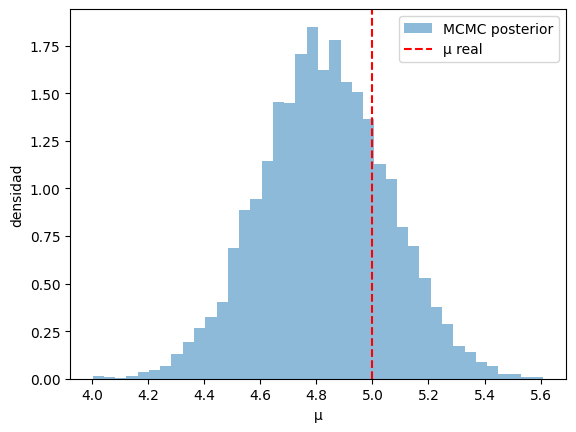

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Datos observados simulados
np.random.seed(42)
mu_real = 5.0
sigma = 1.0
datos = np.random.normal(mu_real, sigma, size=20)

# Prior: N(0, 10^2)
def log_prior(mu):
    return -0.5 * (mu/10)**2

# Log-likelihood con sigma conocido
def log_likelihood(mu, datos, sigma=1.0):
    return -0.5 * np.sum((datos - mu)**2) / sigma**2

# Log-posterior (hasta constante)
def log_posterior(mu, datos, sigma=1.0):
    return log_prior(mu) + log_likelihood(mu, datos, sigma)

# Algoritmo Metropolis para mu
def metropolis(n_pasos, mu_inicial, paso=0.5):
    mu_actual = mu_inicial
    logp_actual = log_posterior(mu_actual, datos, sigma)
    muestras = [mu_actual]
    acept = 0
    
    for _ in range(n_pasos):
        mu_prop = mu_actual + np.random.normal(0, paso)
        logp_prop = log_posterior(mu_prop, datos, sigma)
        delta = logp_prop - logp_actual
        
        if delta >= 0 or np.log(np.random.rand()) < delta:
            mu_actual = mu_prop
            logp_actual = logp_prop
            acept += 1
        
        muestras.append(mu_actual)
    
    return np.array(muestras), acept / n_pasos

# Ejecutamos Metropolis
muestras, tasa = metropolis(20000, mu_inicial=0.0, paso=0.5)

# Descarta burn-in (ej: primeros 2000)
muestras_burned = muestras[2000:]

print("Tasa de aceptación:", tasa)
print("Media posterior estimada:", muestras_burned.mean())
print("Desv. típica posterior:", muestras_burned.std())

# Graficamos
x = np.linspace(2, 8, 200)
plt.hist(muestras_burned, bins=40, density=True, alpha=0.5, label="MCMC posterior")
plt.axvline(mu_real, color="r", linestyle="--", label="μ real")
plt.xlabel("μ")
plt.ylabel("densidad")
plt.legend()
plt.show()
